# Recurrent Neural Network and Language Modeling

## Basics of Recurrent Neural Networks(RNNs)

### Types of RNN
* RNN : sequence data가 입력 또는 출력으로 주어진 상황에서 각 timestep에서 들어오는 input vector $x_t$ 와 전 timestep의 RNN module에서 계산한 hiden state vector $h_{t-1}$을 입력으로 받아서 현재 timestep에서의 $h_t$를 output으로 내어주는 구조
  * 서로 다른 timestep에서 들어오는 input값을 처리할 때 동일한 parameter를 가지고 반복적으로 등장하는 module
  * 매 timestep에서 반복적으로 사용함
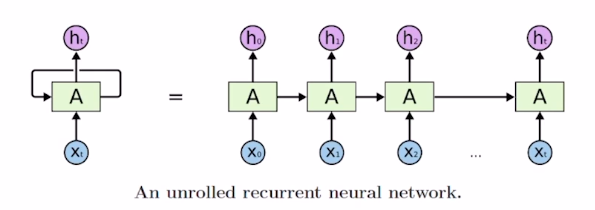

### Recurrent Neural Network
* rolled version
  * RNN에서의 hidden state vector가 다음 timestep의 input으로 쓰임과 동시에 hidden state vector가 필요한 경우 출력값을 계산해줄 수 있어야함
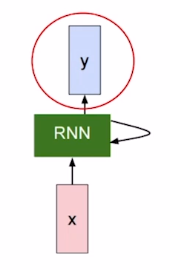

* Calculate Hidden state of RNNs
  * $h_t = f_W(h_{t-1}, x_t)$
    * $h_{t-1}$ : 전 time의 hidden-state vector
    * $x_t$ : input vector
    * $f_W$ : W(Linear Transformation Matrix)를 paraemter로 가지는 RNN function
    * $h_t$ : 계산된 현재 timestep에서의 hidden-state vector
    * $y_t$ : timestep t에서 최종 예측값에 해당하는 output, 매번 계산할 수도 있고, 마지막에만 계산할 수도 있음
      * ex) 각 단어의 품사를 예측하는 경우 매번 계산해야함, 문장의 긍정/부정을 확인하는 경우 마지막에만 계산하면 됨

* 매 timestep마다 RNN을 정의하는 parameter $W$는 모든 timestep에서 동일한 값을 공유함
* $f_W$ 정의
  $$h_t = f_W(h_{t-1}, x_t) \\ \downarrow \\ h_t = \tanh{(W_{hh}h_{t-1} + W_{xh}x_t)} \\ y_t = W_{hy}h_t$$
  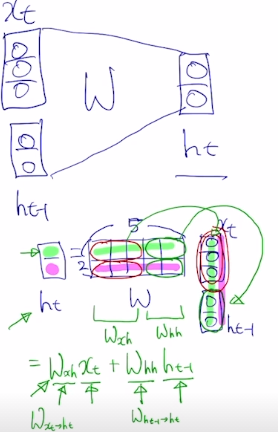


## Types of RNNs

### One-to-one
* Sequence data와 timestep이 아닌 일반적인 model 구조
* Standard Neural Networks
* input 1개, output 1개
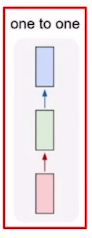


### One-to-many
* input : 하나의 timestep
* output : 여러개의 timestep
* ex) Image Captioning
  * input이 첫 번째 timestep에서만 주어짐
    * 나머지 timestep에서는 동일한 사이즈의 tensor(값은 모두 0)를 input으로 주어짐
  * input에 필요한 각 단어들을 timestep 별로 순차적으로 생성함
  
  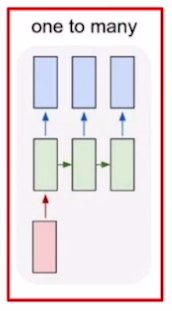

### Many-to-one
* Sequence를 input으로 받은 후, 마지막 timestep에서 최종값을 output으로 내어줌
* ex) Sentiment Classification
  * 마지막 $h_t$에 output layer를 적용하여 output(긍정/부정)을 계산함

  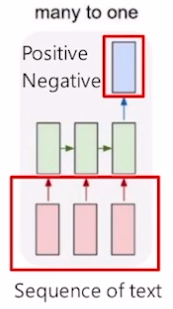


### Sequence-to-sequence
* ex) Machine Translation
  * input이 들어오면 그에 해당하는 번역을 하여 output으로 내어줌
  * input 문장을 다 읽은 후 해당하는 단어를 내어줌

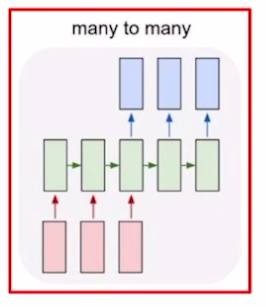

* ex) Video classification on frame level
  * input이 주어질 때마다 예측을 수행하는 형태(output을 내어줌)
  * 시간순으로 이루어진 image(frame)이 주어지면 어떤 scene에 해당하는지 분류
  * delay가 존재하지 않음(허용되지 않음)
  * 문장의 단어들의 품사를 예측하는 경우에도 해당됨

  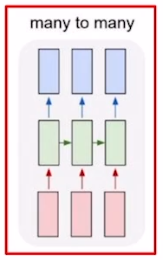

## Character-level Language Model

## Characrter-level Language Model
* 문자열이나 단어들의 순서를 가지고 다음 단어 또는 문자가 무엇인지를 맞추는 task
* ex) "hello"
  * Vocabulary : [h, e, l, o]
  * h가 주어지면 다음 문자인 e를 예측해야함
  * h와 e가 주어지면 다음 문자인 l을 예측해야 함
  * h, e와 l이 주어지면 다음 문자인 l을 예측해야 함
  * h, e, l, l이 주어지면 다음 문자인 o을 예측해야 함

$$h_t = \tanh{(W_{hh}h_{t-1} + W_{xh}x_t + b)}$$

$$\mathrm{Logit} = W_{hy}h_t + b$$

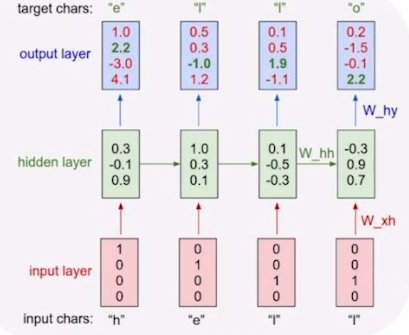

* 문단에 대해 학습하는 경우 띄어쓰기,쉼표 등의 특수문자도 Vocabulary에 기록해줘야함
  * 학습이 진행되지 않은 model을 사용하는 경우 character가 주어졌을 때, 의미없는 단어들의 나열이 될 수 있음
  * 학습이 진행될수록 원하는 결과에 가까움

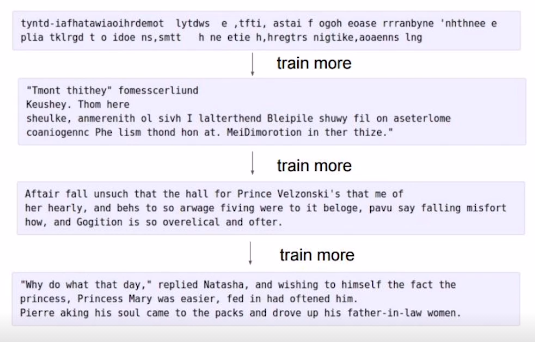

* 그 외에도 대본, 논문, 프로그래밍 파일(code)도 작성할 수 있음

### Backpropagation through time (BPTT)
* Character-level Language Model의 학습 과정
  * 매 번의 timestep 마다 주어진 character(input)에서 발생 된 hidden-state vector를 통해 output layer를 각자 통과시켜준 후, 나오는 예측값과 ground-truth의 비교를 통한 loss function을 통해서 전체 network가 학습이 진행됨
  * $W_{xh}$, $W_{hh}$, $W_{hy}, h_t$ 행렬들이 backpropagation에 의해서 학습이 진행 됨

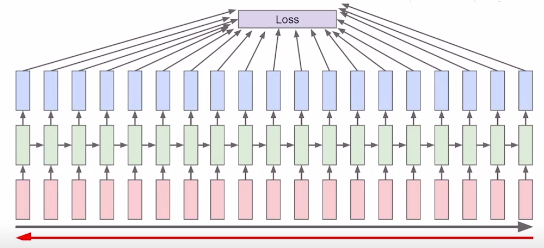

* 문단인 경우 한번에 계산해야하는 sequence가 매우 길 수 있음
  * GPU 메모리를 초과하여 한번에 담기지 못할 수 있음
  * truncation : sequence 를 잘라서 제한된 길이의 sequence를 가지고 학습함

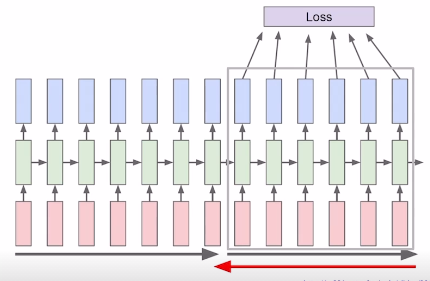

### Searching for Interpretable Cells
* 필요로 하는 정보를 저장하는 공간 : hidden-state vector
  * ex) 공백을 2번 생성해야함, 현재까지 1번 생성함 등등
* 필요한 정보가 hidden-state vector의 dimension들 중에 어디에 저장되어있는지 역추적하여 분석을 수행함
  * hidden-state vector의 dimension 하나를 고정하고, timestep이 진행됨에 따라 어떻게 변하는지를 분석함으로서 RNN의 특성을 분석함
* ex) Quote detection cell
  * hidden-state가 따옴표가 열렸는지, 닫혔는지에 대한 상태를 기억하는 역할
    * 따옴표가 열린 경우 `-` 값을 가지고 닫힌 후에는 `+` 값을 가짐

### Vanishing/Exploding Gradient Problem in RNN
* Fully Connected Layer로 구성되는 Vinilla RNN(Original RNN)을 사용하는 경우, 동일한 matrix를 매 timestep마다 곱하게 됨
  * 등비수열처럼 동일한 matrix가 계속 곱해지면 값이 기하급수적으로 커지거나 작아져서 gradient가 기하급수적으로 커져서 무한대에 가까워지거나 작아져서 영향력이 없어져 학습이 되지 않음

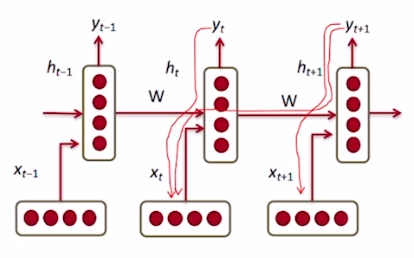

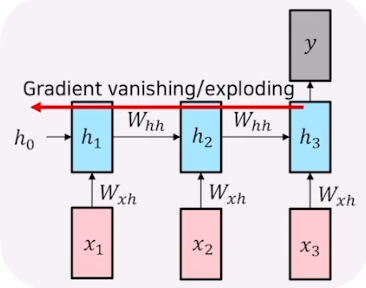

